# 1. Data to be used

These are the link to my data sets:

In [1]:
corr='https://github.com/EvansDataScience/basicFinal_CompThink/raw/master/data/corruption.csv'
econ='https://github.com/EvansDataScience/basicFinal_CompThink/raw/master/data/economic.csv'
press='https://github.com/EvansDataScience/basicFinal_CompThink/raw/master/data/press.csv'

The data are about:

* The _corr_ has data about the _Corruption Perception Index_ (CPI) produced by [Transparency International](https://www.transparency.org/).

* The _econ_ has data about the _Economic Freedom Index_ (EFI) produced by [Fraser Institute](https://www.fraserinstitute.org).

* The _press_ has data about the _World Press Freedom Index_ (WPFI) produced by [Reporters Without Borders](https://rsf.org/en/world-press-freedom-index).

# 2. Reading the data

In [2]:
import pandas as pd
corrupt=pd.read_csv(corr,encoding='Latin-1')
econo=pd.read_csv(econ,encoding='Latin-1')
press=pd.read_csv(press,encoding='Latin-1')

The are the columns I have in each:

In [3]:
corrupt.columns,econo.columns,press.columns

(Index(['iso', 'Country', 'corruptionIndex'], dtype='object'),
 Index(['ISO', 'Country', 'scoreEconomy'], dtype='object'),
 Index(['ISO', 'Country', 'scorepress'], dtype='object'))

For merging, I could use _ISO_ codes or _country_.  I will use the codes, as names can be differently written by the organization that produced the index.

# 3. Data set preparation

I **acknowledge** that as each data set has a differing amount of countries, the merged files will only have the countries found in all 3 files.

In [4]:
# first merge:

join1=pd.merge(corrupt,econo,left_on='iso',right_on='ISO')


join1.head()

,iso,Country_x,corruptionIndex,ISO,Country_y,scoreEconomy
0,ALB,Albania,39,ALB,Albania,7.54
1,DZA,Algeria,34,DZA,Algeria,4.84
2,AGO,Angola,18,AGO,Angola,5.40
3,ARG,Argentina,36,ARG,Argentina,4.88
4,ARM,Armenia,33,ARM,Armenia,7.60


In [5]:
allIndexes=pd.merge(join1,press,on='ISO')
allIndexes.head()

,iso,Country_x,corruptionIndex,ISO,Country_y,scoreEconomy,Country,scorepress
0,ALB,Albania,39,ALB,Albania,7.54,Albania,29.92
1,DZA,Algeria,34,DZA,Algeria,4.84,Algeria,41.69
2,AGO,Angola,18,AGO,Angola,5.40,Angola,39.89
3,ARG,Argentina,36,ARG,Argentina,4.88,Argentina,25.09
4,ARM,Armenia,33,ARM,Armenia,7.60,Armenia,28.79


The final data set has columns that are not needed, I will get rid of them:

In [6]:
bye=['Country_x','ISO','Country_y']
allIndexes.drop(bye,axis=1,inplace=True)

The current data is:

In [7]:
allIndexes.head()

,iso,corruptionIndex,scoreEconomy,Country,scorepress
0,ALB,39,7.54,Albania,29.92
1,DZA,34,4.84,Algeria,41.69
2,AGO,18,5.40,Angola,39.89
3,ARG,36,4.88,Argentina,25.09
4,ARM,33,7.60,Armenia,28.79


I could leave it so, but I will move the country to the second column:

In [8]:
newOrder=['iso','Country','corruptionIndex','scoreEconomy','scorepress']
allIndexes=allIndexes[newOrder]
allIndexes.head()

,iso,Country,corruptionIndex,scoreEconomy,scorepress
0,ALB,Albania,39,7.54,29.92
1,DZA,Algeria,34,4.84,41.69
2,AGO,Angola,18,5.40,39.89
3,ARG,Argentina,36,4.88,25.09
4,ARM,Armenia,33,7.60,28.79


# 4. Data information

As always it is good to verify the data types:

In [9]:
allIndexes.dtypes

iso                 object
Country             object
corruptionIndex      int64
scoreEconomy       float64
scorepress         float64
dtype: object

And check descriptives:

In [10]:
allIndexes.iloc[:,2:].describe() 

,corruptionIndex,scoreEconomy,scorepress
count,153.000000,153.000000,153.000000
mean,44.156863,6.794379,32.639608
std,19.273693,0.928871,14.630747
min,13.000000,2.920000,8.590000
25%,30.000000,6.290000,23.830000
50%,38.000000,6.910000,30.170000
75%,57.000000,7.470000,40.700000
max,90.000000,8.970000,81.350000


In [11]:
allIndexes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 5 columns):
iso                153 non-null object
Country            153 non-null object
corruptionIndex    153 non-null int64
scoreEconomy       153 non-null float64
scorepress         153 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.2+ KB


We have 153 countries, and no missing values.

# 5. Monotony of values

It is important to see if all the values follow the same monotony; whether increasing or decreasing. I detect that with a scatter plot

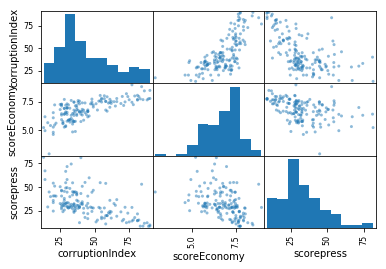

In [12]:
% matplotlib inline
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(allIndexes.iloc[:,2:])
plt.show()

Score press is negatively correlated to the rest. That means that the score for that column needs to be reversed:

In [13]:
# creating reversing function:
def reverse(aColumn):
    return max(aColumn) - aColumn + min(aColumn)

In [14]:
# reversing using function:
allIndexes.scorepress=reverse(allIndexes.scorepress)

We should see a different result:

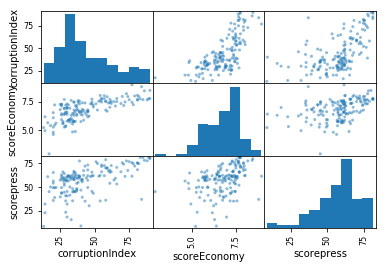

In [15]:
pd.plotting.scatter_matrix(allIndexes.iloc[:,2:6])
plt.show()

# 6. Renaming

We know they are indexes, so we have simpler names:

In [16]:
# old names:
allIndexes.columns

Index(['iso', 'Country', 'corruptionIndex', 'scoreEconomy', 'scorepress'], dtype='object')

In [17]:
#newNames 
newNames=['iso', 'country', 'corruption', 'economy', 'press']

In [18]:
# creating map

nameChanges={old:new for old,new in zip(allIndexes.columns,newNames)}

This is my dictionary of changes:

In [19]:
nameChanges

{'iso': 'iso',
 'Country': 'country',
 'corruptionIndex': 'corruption',
 'scoreEconomy': 'economy',
 'scorepress': 'press'}

In [20]:
allIndexes.rename(nameChanges,axis=1,inplace=True)

In [21]:
# I have now:

allIndexes.head()

,iso,country,corruption,economy,press
0,ALB,Albania,39,7.54,60.02
1,DZA,Algeria,34,4.84,48.25
2,AGO,Angola,18,5.40,50.05
3,ARG,Argentina,36,4.88,64.85
4,ARM,Armenia,33,7.60,61.15


# 7. Saving file for R

I can send this to R:

In [22]:
allIndexes.to_csv("dataProject.csv",index=None)